In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2012.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2012,17732,286,29,3522
1,2012,17078,419,25,3505
2,2012,17452,28,38,3552
3,2012,17836,174,26,3550
4,2012,17972,135,13,3557
...,...,...,...,...,...
1828,2012,17077,421,18,3537
1829,2012,17983,414,38,3528
1830,2012,17614,341,25,3557
1831,2012,17374,181,24,3526


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1833, 5)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1833 non-null   int64
 1   Maximum length (m))  1833 non-null   int64
 2   Recession(m),        1833 non-null   int64
 3   Rate/yr(m)           1833 non-null   int64
 4   Snout altitude (m)   1833 non-null   int64
dtypes: int64(5)
memory usage: 71.7 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1833


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2012,17732,286,29,3522
1,2012,17078,419,25,3505
2,2012,17452,28,38,3552
3,2012,17836,174,26,3550
4,2012,17972,135,13,3557


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0126,-0.0309,-0.0123
"Recession(m),",NaN,0.0126,1.0000,-0.0213,-0.0236
Rate/yr(m),NaN,-0.0309,-0.0213,1.0000,0.0415
Snout altitude (m),NaN,-0.0123,-0.0236,0.0415,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0126
Snout altitude (m)    -0.0123
Rate/yr(m)            -0.0309
Year                      NaN
Name: Maximum length (m)), dtype: float64

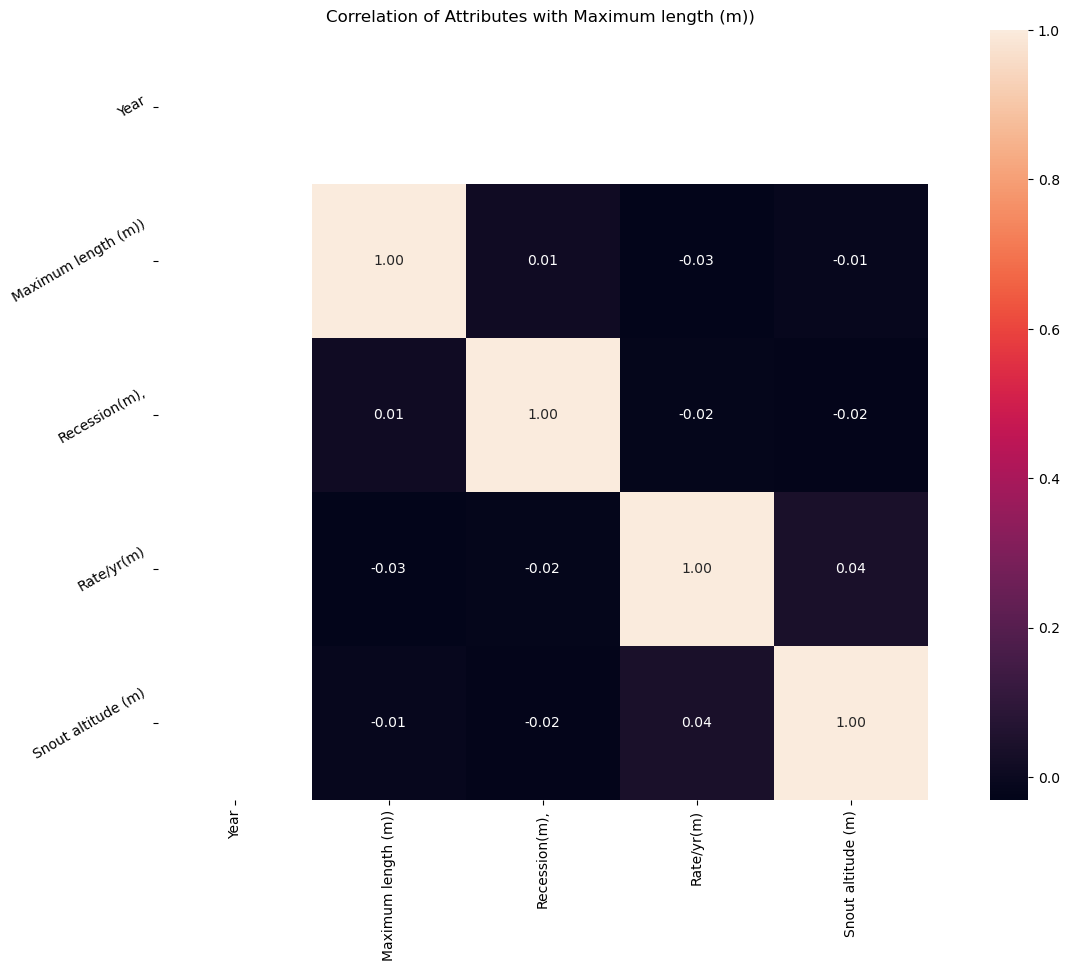

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,833.0000","1,833.0000","1,833.0000","1,833.0000","1,833.0000"
mean,"2,012.0000","17,559.3601",219.9771,27.2270,"3,531.5941"
std,0.0000,299.4077,127.7045,8.7405,20.2396
min,"2,012.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,012.0000","17,296.0000",108.0000,19.0000,"3,514.0000"
50%,"2,012.0000","17,578.0000",221.0000,27.0000,"3,531.0000"
75%,"2,012.0000","17,819.0000",330.0000,35.0000,"3,549.0000"
max,"2,012.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2012   1.0000
Name: Year, dtype: float64

115   0.0060
207   0.0060
239   0.0055
365   0.0055
26    0.0055
       ...  
142   0.0005
343   0.0005
199   0.0005
191   0.0005
329   0.0005
Name: Recession(m),, Length: 436, dtype: float64

31   0.0409
17   0.0404
38   0.0398
39   0.0382
16   0.0382
15   0.0376
14   0.0376
34   0.0366
23   0.0366
37   0.0355
26   0.0349
19   0.0349
20   0.0344
24   0.0338
18   0.0333
13   0.0333
33   0.0333
35   0.0327
40   0.0322
29   0.0316
36   0.0316
32   0.0311
28   0.0300
25   0.0295
42   0.0289
27   0.0289
22   0.0289
21   0.0278
41   0.0245
30   0.0229
Name: Rate/yr(m), dtype: float64

3554   0.0191
3519   0.0185
3511   0.0185
3523   0.0180
3528   0.0180
        ...  
3555   0.0109
3503   0.0109
3550   0.0109
3539   0.0098
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



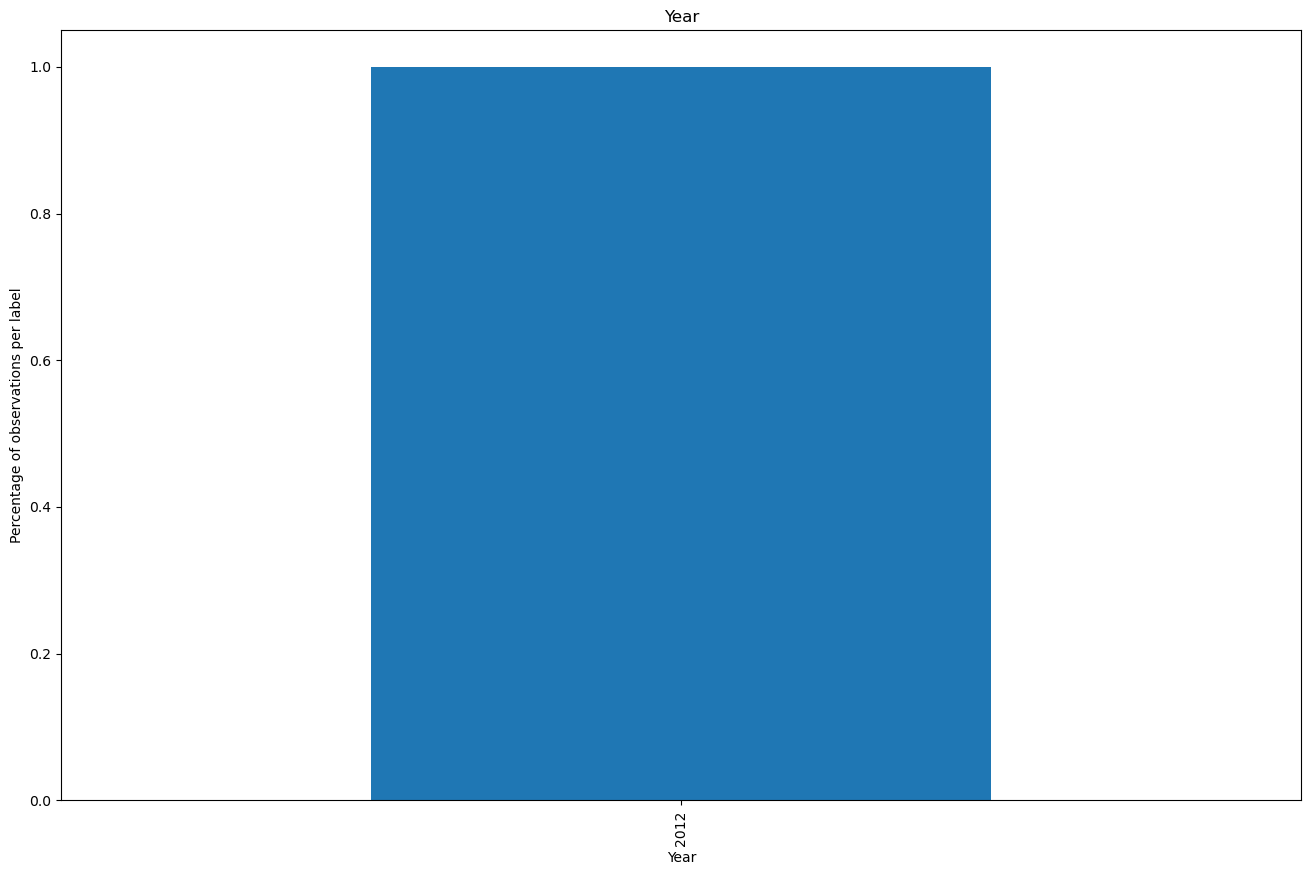

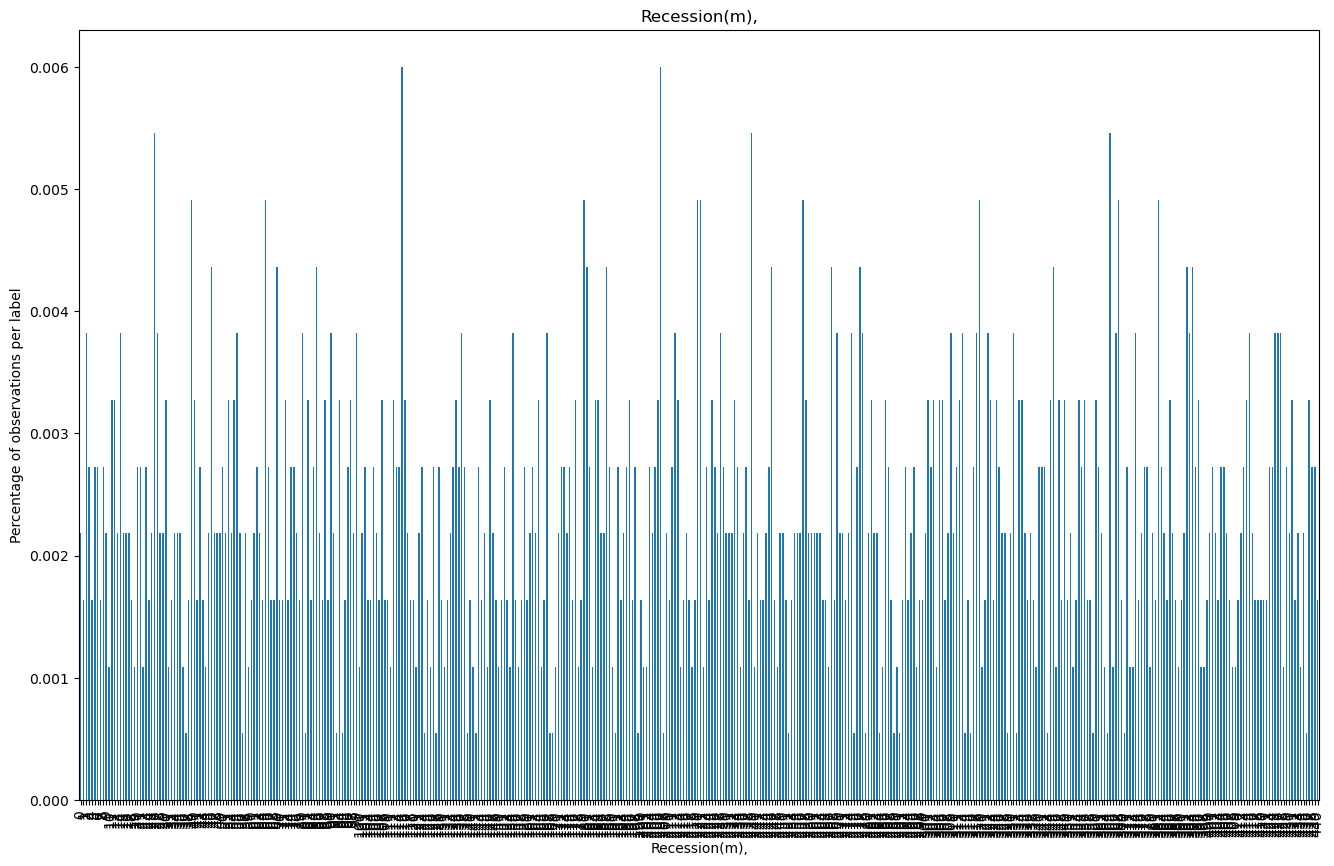

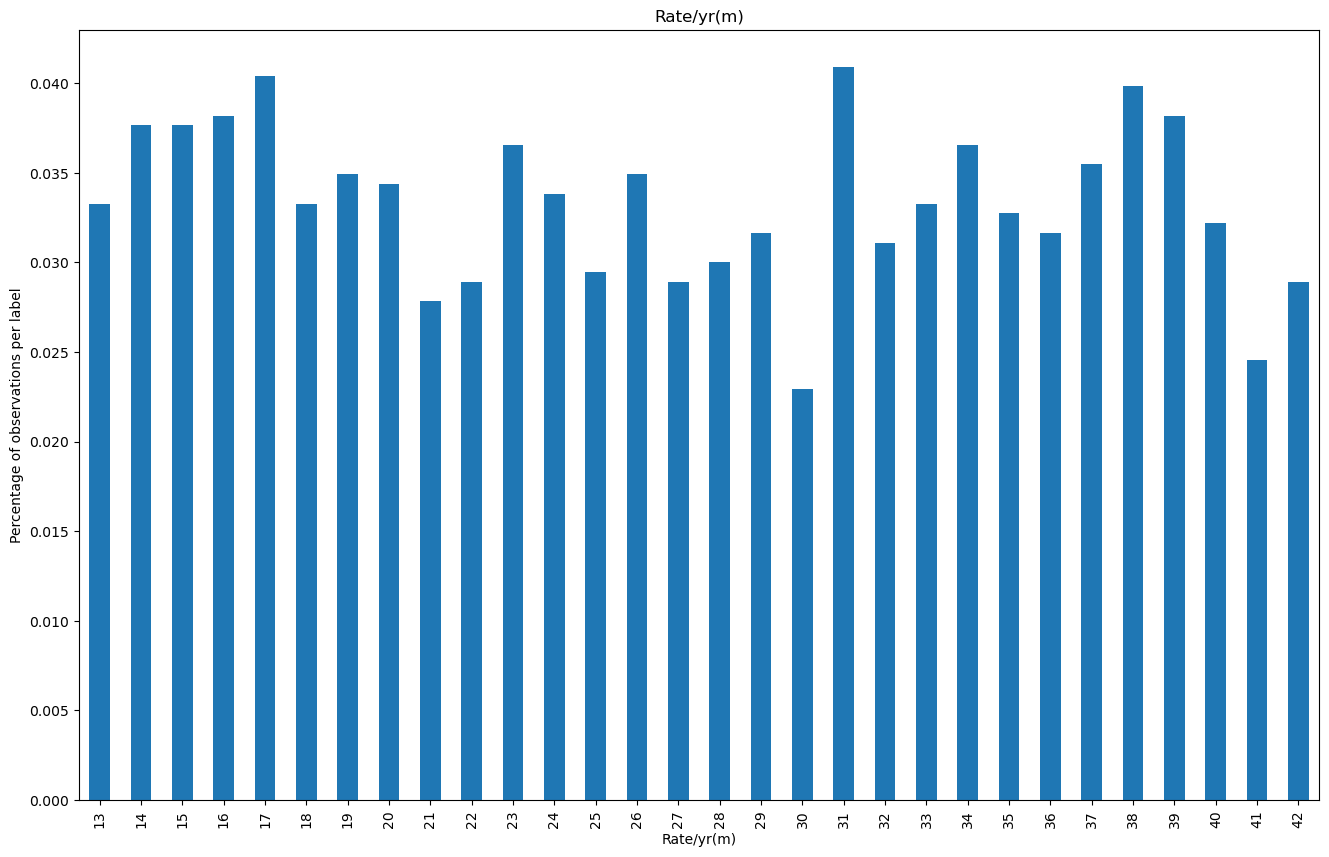

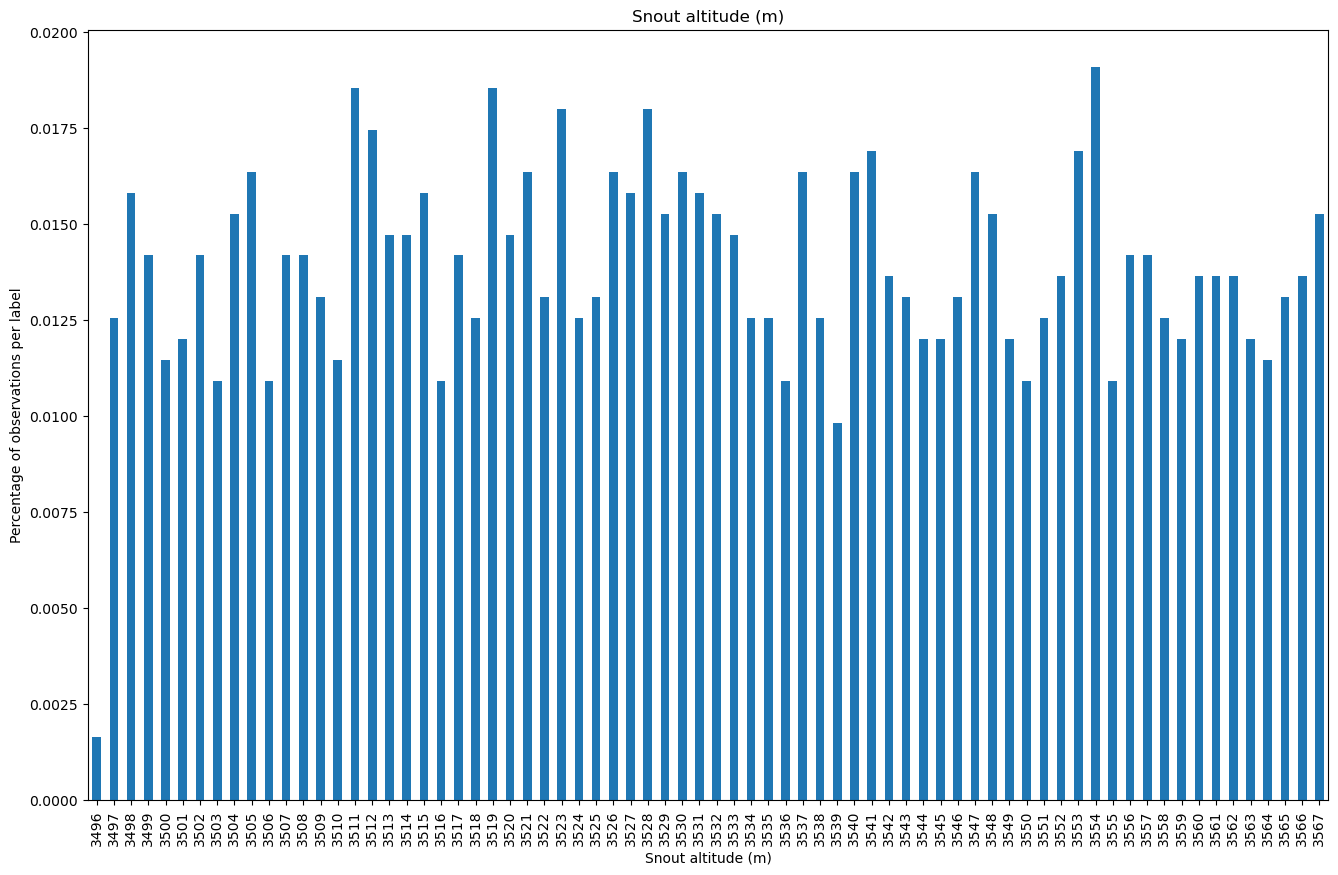

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()